**Name : Anshika Ranjan**

**PRN : 21070126014**

**Division : AIML A1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread("/content/WhatsApp Image 2022-11-09 at 09.59.31_eaa4812c.jpg", 0)

In [3]:
print(img.shape)

(1024, 768)


GAUSSIAN NOISE

In [4]:
# Create a grayscale image with the same dimensions as img
gaussian_noise = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Generate Gaussian noise
cv2.randn(gaussian_noise, 128, 20)

# Scale and convert to uint8
gaussian_noise = (gaussian_noise * 0.5).astype(np.uint8)

# Resize gaussian_noise to match the dimensions of img
gaussian_noise = cv2.resize(gaussian_noise, (img.shape[1], img.shape[0]))

# Add the noise to the image
gaussian_image = cv2.add(img, gaussian_noise)

Text(0.5, 1.0, 'Noisy Image')

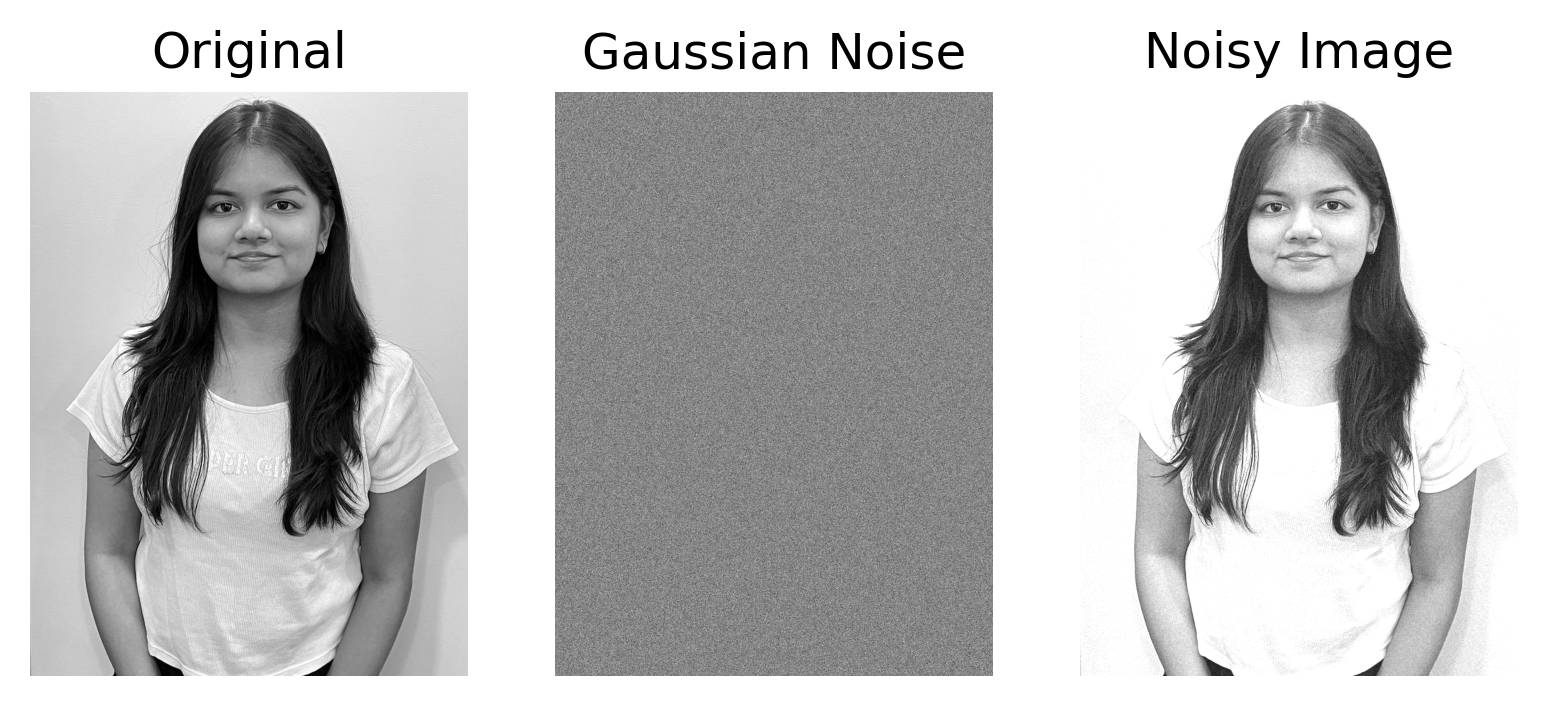

In [5]:
fig = plt.figure(dpi = 300)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gaussian_noise, cmap="gray")
plt.axis('off')
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gaussian_image, cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

RAYLEIGH NOISE

In [6]:
img = img.astype(np.float64)
noise_std = 0.2
noise_rayleigh = np.random.rayleigh(noise_std, img.shape)
rayleigh_image = cv2.addWeighted(img, 1, noise_rayleigh, 70, 0.0).astype(np.uint8)

Text(0.5, 1.0, 'Noisy Image')

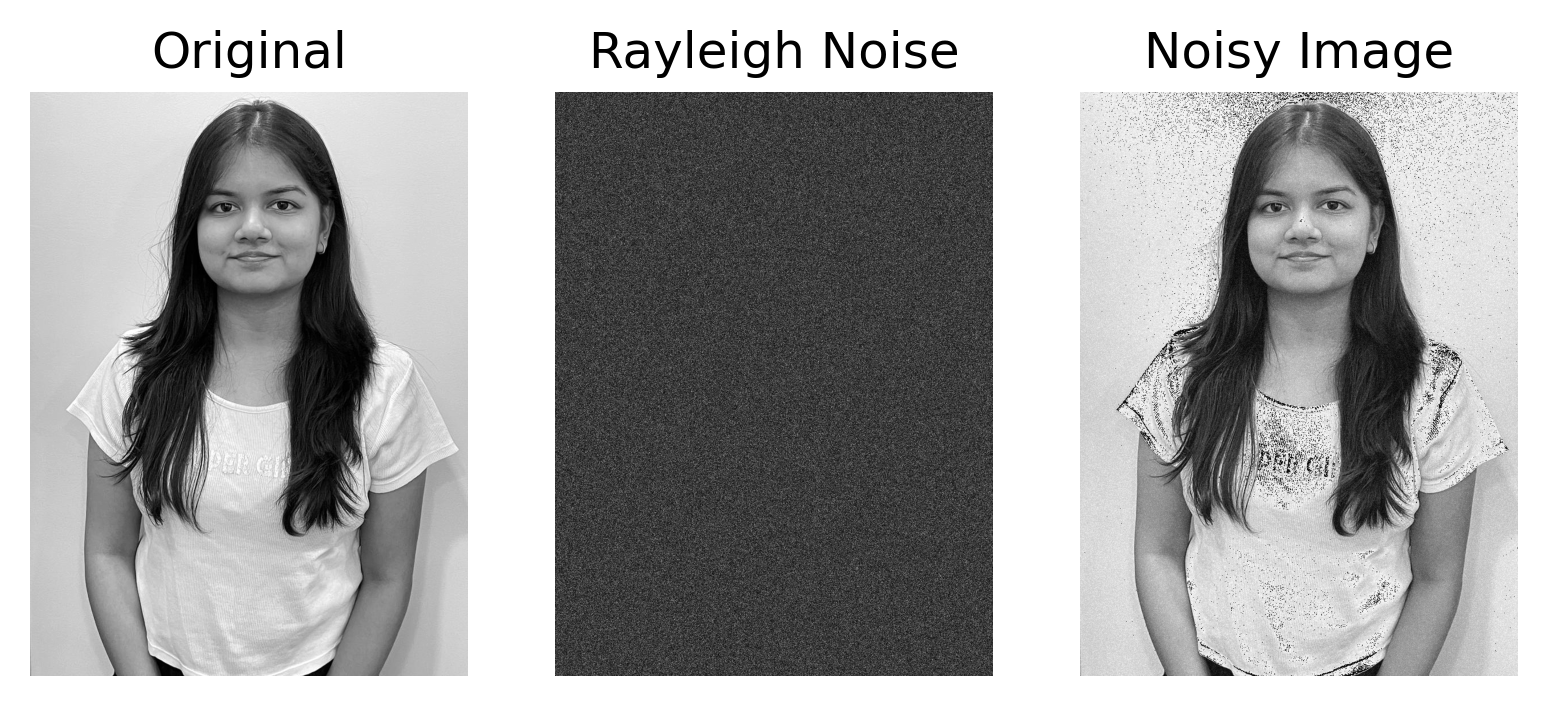

In [7]:
fig = plt.figure(dpi = 300)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(noise_rayleigh, cmap="gray")
plt.axis('off')
plt.title("Rayleigh Noise")

fig.add_subplot(1,3,3)
plt.imshow(rayleigh_image, cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

SALT AND PEPPER NOISE

In [8]:
# Generate impulse noise
imp_noise = np.zeros((450,800), dtype=np.uint8)
cv2.randu(imp_noise, 0, 255)
imp_noise = cv2.threshold(imp_noise, 245, 255, cv2.THRESH_BINARY)[1]
imp_noise = cv2.resize(imp_noise, (img.shape[1], img.shape[0]))  # Resize imp_noise to match img's shape

# Add impulse noise to the image
snp_img = cv2.add(img.astype(np.float32), imp_noise.astype(np.float32)).astype(np.uint8)


Text(0.5, 1.0, 'Noisy Image')

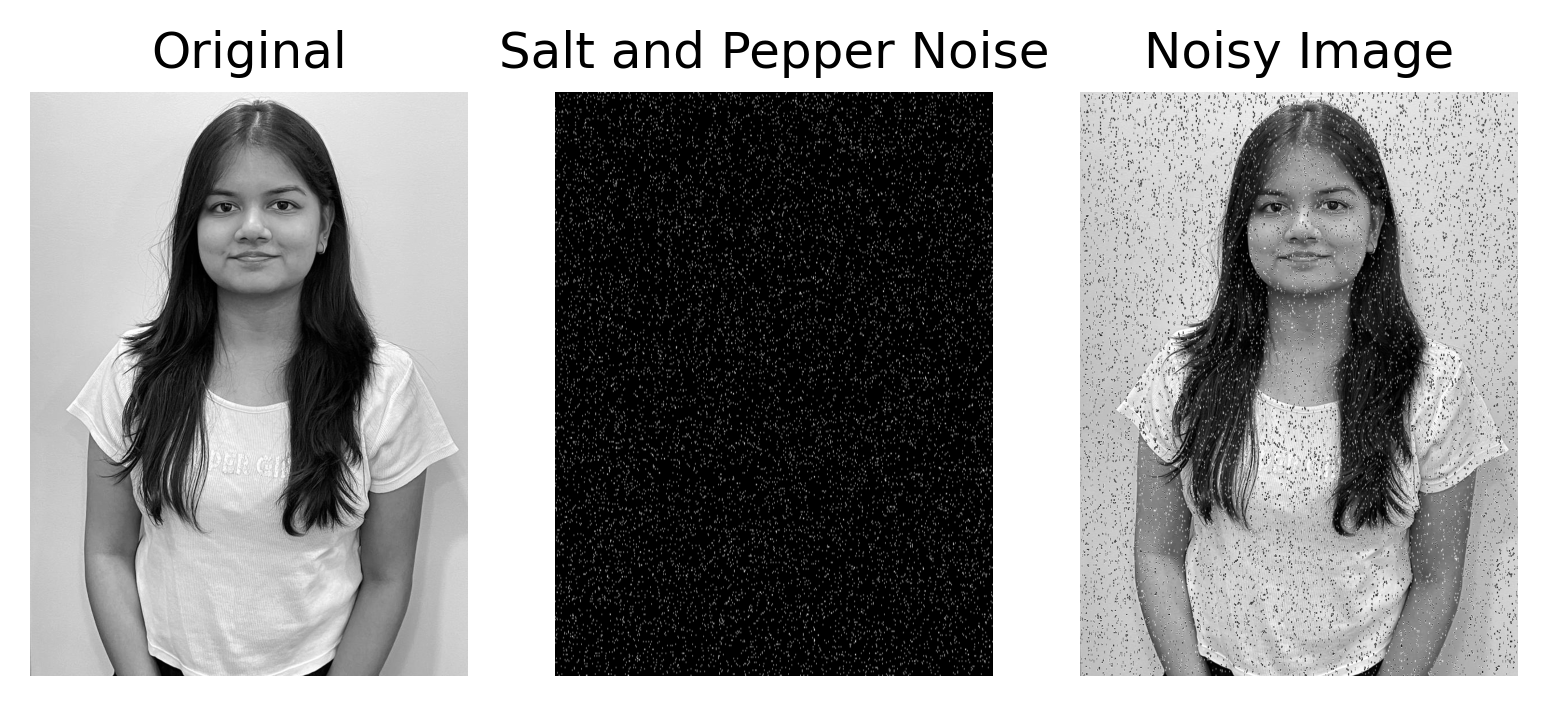

In [9]:
fig = plt.figure(dpi = 300)

fig.add_subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(imp_noise, cmap="gray")
plt.axis('off')
plt.title("Salt and Pepper Noise")

fig.add_subplot(1,3,3)
plt.imshow(snp_img, cmap="gray")
plt.axis('off')
plt.title("Noisy Image")

FILTERS

In [10]:
def filters(image):
    # Median filtering
    median = cv2.medianBlur(image, 5)
    compare_median = np.concatenate((image, median), axis=1)

    # Mean (average) filtering
    mean = cv2.blur(image, (5, 5))
    compare_mean = np.concatenate((image, mean), axis=1)

    # Harmonic filtering
    harmonic_kernel = np.reciprocal(cv2.blur(np.reciprocal(image.astype(np.float32)), (5, 5)))
    harmonic = cv2.filter2D(image, -1, harmonic_kernel)
    compare_harmonic = np.concatenate((image, harmonic), axis=1)

    # Geometric mean filtering
    geometric_kernel = np.exp(cv2.blur(np.log(image.astype(np.float32)), (5, 5)))
    geometric = cv2.filter2D(image, -1, geometric_kernel)
    compare_geometric = np.concatenate((image, geometric), axis=1)

    return compare_median, compare_mean, compare_geometric, compare_harmonic

In the above code, we wrote a function for the filters that are to be used.

**Median Filter**: In the median filter, the value of each pixel is replaced by the median value calculated in a local neighborhood.

**Mean Filter**: The mean filter replaces the value of each pixel by the average of all pixel values in a local neighborhood.

**Harmonic Mean Filter**: In the harmonic mean method, the color value of each pixel is replaced with the harmonic mean of color values of the pixels in a surrounding region.

**Geometrc Mean Filter**: In the geometric mean method, the color value of each pixel is replaced with the geometric mean of color values of the pixels in a surrounding region.

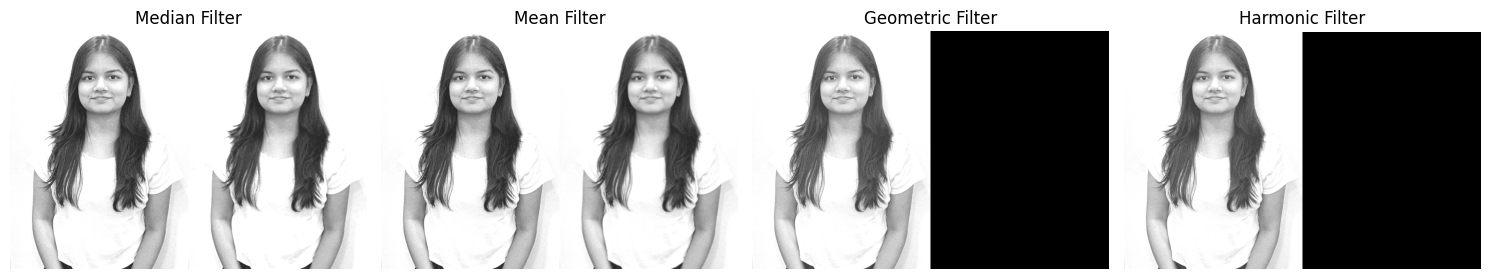

In [11]:
#on guassian noise image
median, mean, geometric, harmonic = filters(gaussian_image)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot images
titles = ['Median Filter', 'Mean Filter', 'Geometric Filter', 'Harmonic Filter']
images = [median, mean, harmonic, geometric]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-10-26610cbca27b>:11: RuntimeWarning: divide by zero encountered in reciprocal
  harmonic_kernel = np.reciprocal(cv2.blur(np.reciprocal(image.astype(np.float32)), (5, 5)))
<ipython-input-10-26610cbca27b>:16: RuntimeWarning: divide by zero encountered in log
  geometric_kernel = np.exp(cv2.blur(np.log(image.astype(np.float32)), (5, 5)))


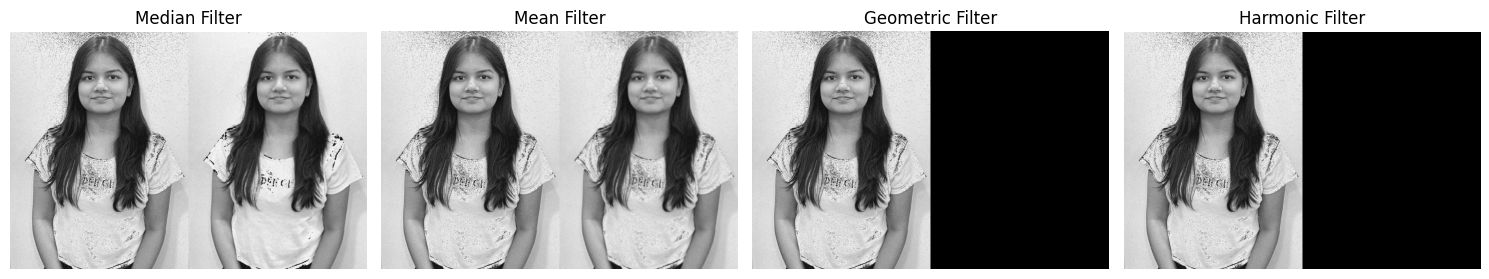

In [12]:
#on rayleigh noise image
median, mean, geometric, harmonic = filters(rayleigh_image)

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot images
titles = ['Median Filter', 'Mean Filter', 'Geometric Filter', 'Harmonic Filter']
images = [median, mean, harmonic, geometric]

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-10-26610cbca27b>:11: RuntimeWarning: divide by zero encountered in reciprocal
  harmonic_kernel = np.reciprocal(cv2.blur(np.reciprocal(image.astype(np.float32)), (5, 5)))
<ipython-input-10-26610cbca27b>:16: RuntimeWarning: divide by zero encountered in log
  geometric_kernel = np.exp(cv2.blur(np.log(image.astype(np.float32)), (5, 5)))


(-0.5, 1535.5, 1023.5, -0.5)

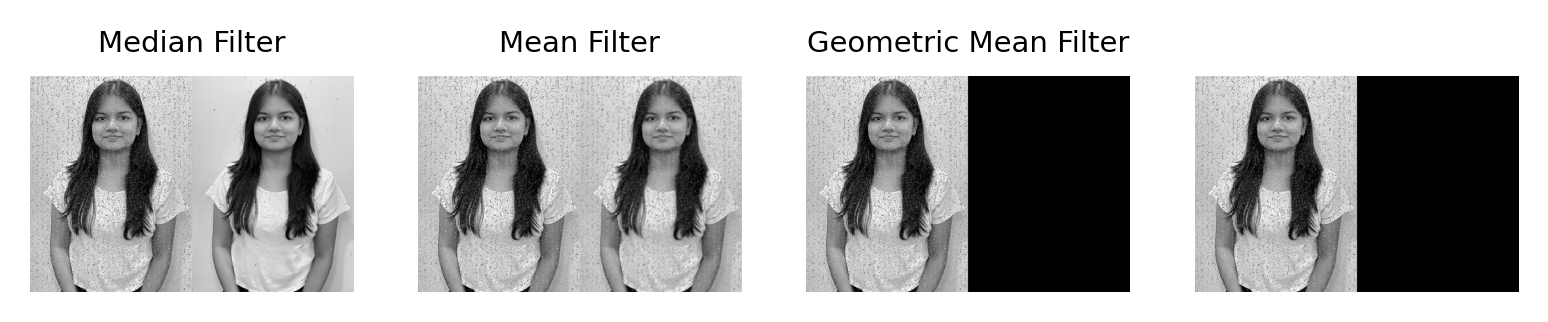

In [14]:
#on salt and pepper noise image
median, mean, geometric, harmonic = filters(snp_img)

fig = plt.figure(dpi = 300)

fig.add_subplot(1,4,1)
plt.imshow(median, cmap="gray")
plt.axis('off')
plt.title("Median Filter", fontsize=7)

fig.add_subplot(1,4,2)
plt.imshow(mean, cmap="gray")
plt.axis('off')
plt.title("Mean Filter", fontsize=7)

fig.add_subplot(1,4,3)
plt.imshow(geometric, cmap="gray")
plt.axis('off')
plt.title("Geometric Mean Filter", fontsize=7)

fig.add_subplot(1,4,4)
plt.imshow(harmonic, cmap="gray")
plt.axis('off')

We added three noises to the original image namely Gaussian noise, Rayleigh noise and Salt and pepper noise also known as impulse noise. After that we applied filters on each of the noisy image and we found out that mean filter reduces the noise in the image and smoothens the image. Median filter preserves the edges in an image. The geometric mean filter and the harmonic mean filter resulted in a completely black image. This occurred because the kernels used primarily captured black pixels, leading to filter coefficients that included more pixels with darker intensity values. As a result, the resulting image appeared uniformly black.